In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.9 MB/s eta 0:00:00


In [2]:
use_refiner = True

In [3]:
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

In [7]:
refiner = None
pipe = None
import gc
gc.collect()

torch.cuda.empty_cache()
base_output = []
prompt_details = []

prompt = "a photo of a Lion cuddling a tiger"
image_count = 2
output_images = []

if pipe is None:

  refiner = None
  import gc
  gc.collect()

  pipe = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-xl-base-1.0",
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16",
      ).to('cuda')


base_output = []
prompt_details = []

for i in range(image_count):

  seed = random.randint(0, sys.maxsize)

  images = pipe(
    prompt = prompt,
    output_type = "latent" if use_refiner else "pil",
    generator = torch.Generator("cuda").manual_seed(seed),
    num_inference_steps=30
    ).images

  if use_refiner:
    base_output.append(images)
    prompt_details.append(f"Prompt:\t{prompt}\nSeed:\t{seed}")
  else:
    print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
    media.show_images(images)

if use_refiner:

  refiner = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-xl-refiner-1.0",
      text_encoder_2=pipe.text_encoder_2,
      vae=pipe.vae,
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16",
  ).to('cuda')

  pipe = None
  torch.cuda.empty_cache()

  for i in range(image_count):

    if use_refiner:
      images = refiner(
          prompt = prompt,
          image = base_output[i],
          ).images

    print(prompt_details[i])
    # media.show_images(images)
    output_images.append(images)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Prompt:	a photo of a Lion cuddling a tiger
Seed:	2081290141066607607


  0%|          | 0/15 [00:00<?, ?it/s]

Prompt:	a photo of a Lion cuddling a tiger
Seed:	322869493441840148



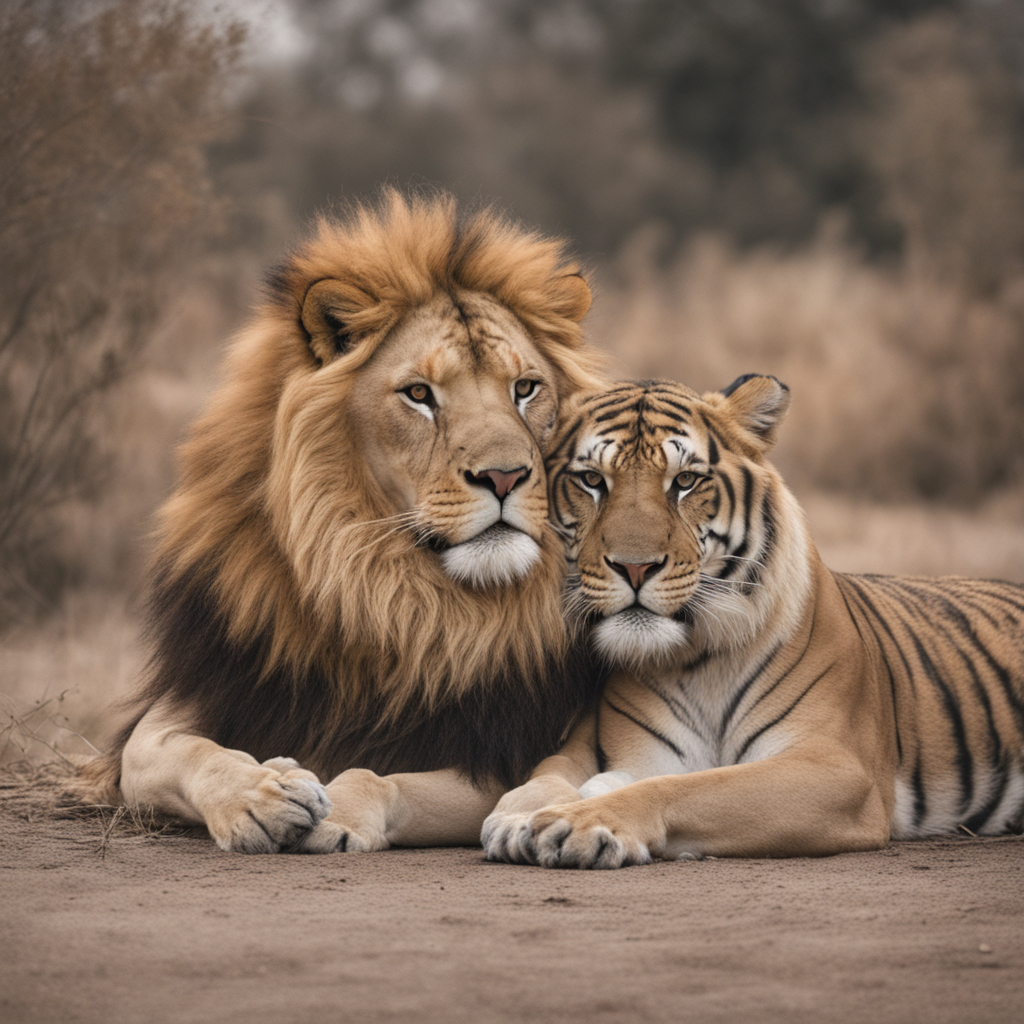

In [8]:
media.show_images(output_images[0])


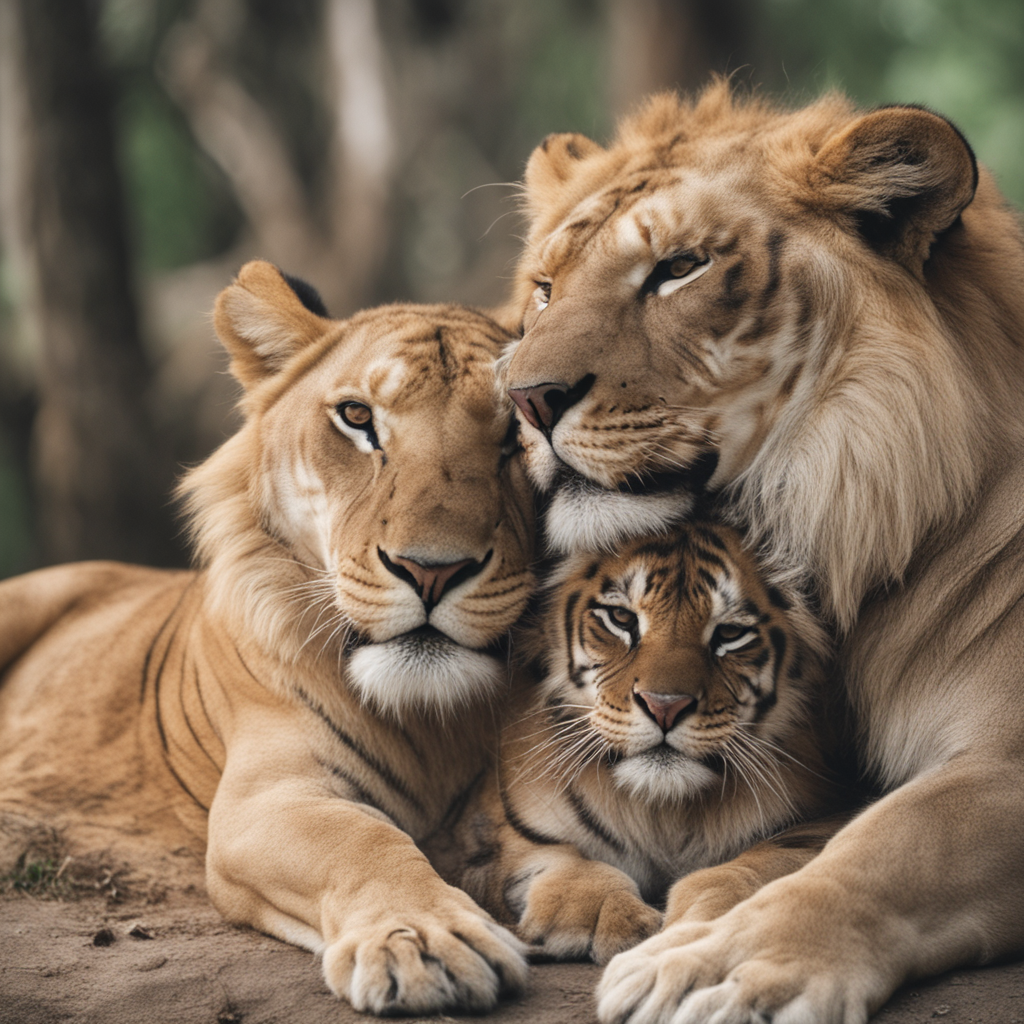

In [9]:
media.show_images(output_images[1])